In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_excel("C:/Users/Admin/Desktop/Milano-BIcocca/Semester 2/Data Science Lab/All_data_FIW_2013-2024 (1).xlsx", sheet_name='FIW13-25', skiprows=1)

In [20]:
# Encode Freedom Status (F, PF, NF) as numbers
label_encoder = LabelEncoder()
df['FreedomStatus_encoded'] = label_encoder.fit_transform(df['Status'])

In [22]:
# Select features
features = ['PR rating', 'CL rating', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
X = df[features]
y = df['FreedomStatus_encoded']

In [24]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [26]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

           F       1.00      1.00      1.00       339
          NF       1.00      1.00      1.00       237
          PF       1.00      1.00      1.00       241

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817



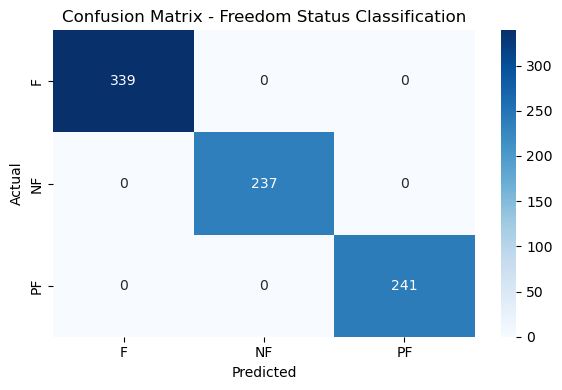

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Freedom Status Classification")
plt.tight_layout()
plt.show()